In [1]:
import experiment
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torch
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
default_exp = experiment.Experiment(name="resnet")


Loading resnet
dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=Fals

<Figure size 432x288 with 0 Axes>

In [4]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(default_exp.model)

23510081

In [5]:
default_exp.train()


Now running epoch 0


Validation data: 100%|██████████| 7/7 [00:00<00:00,  8.92it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.6373148853742325, MSE = 33.61933127028317
Validation losses: MAE = 5.317668865519545, MSE = 30.136042145458227
Now running epoch 1


Validation data: 100%|██████████| 7/7 [00:00<00:00,  9.42it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.575479806522967, MSE = 32.950046751907834
Validation losses: MAE = 5.319492205508765, MSE = 30.176618140637487
Now running epoch 2


Validation data: 100%|██████████| 7/7 [00:00<00:00,  9.62it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.501603557795579, MSE = 32.14026005310701
Validation losses: MAE = 5.303155559631749, MSE = 29.989636536560244
Now running epoch 3


Validation data: 100%|██████████| 7/7 [00:00<00:00,  9.30it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.441836580263196, MSE = 31.491774884018202
Validation losses: MAE = 5.29139412341986, MSE = 29.970356264318546
Now running epoch 4


Validation data: 100%|██████████| 7/7 [00:00<00:00,  8.55it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.374772533435411, MSE = 30.76678131050321
Validation losses: MAE = 5.078157670192269, MSE = 28.0994344973587
Now running epoch 5


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.308286074132385, MSE = 30.033276290210424
Validation losses: MAE = 5.009061429511493, MSE = 27.5538519959886
Now running epoch 6


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.54it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.239649819368827, MSE = 29.324170168472836
Validation losses: MAE = 4.935610462408898, MSE = 26.905688216252884
Now running epoch 7


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.1749449960885245, MSE = 28.70234542709674
Validation losses: MAE = 4.908430921214273, MSE = 26.66098380681217
Now running epoch 8


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.71it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.1017836991859715, MSE = 27.93697741297715
Validation losses: MAE = 4.892979337371565, MSE = 26.19392282192826
Now running epoch 9


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 5.023456218847605, MSE = 27.274593094087518
Validation losses: MAE = 4.848049155460107, MSE = 25.92179794196578
Now running epoch 10


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.52it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.98000289580909, MSE = 26.740584912847083
Validation losses: MAE = 4.83095005250107, MSE = 25.494480508439704
Now running epoch 11


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.894789387717369, MSE = 26.02819876854959
Validation losses: MAE = 4.818560177092538, MSE = 25.31963009507343
Now running epoch 12


Validation data: 100%|██████████| 7/7 [00:01<00:00,  5.99it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.840823022149943, MSE = 25.48039208010718
Validation losses: MAE = 4.841984245774325, MSE = 25.712923731895103
Now running epoch 13


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.19it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.769240711668435, MSE = 24.883865396051494
Validation losses: MAE = 4.7767909328568265, MSE = 25.005629877148685
Now running epoch 14


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.49it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.699203299133657, MSE = 24.312458671972433
Validation losses: MAE = 4.709262655977108, MSE = 24.53285380549071
Now running epoch 15


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.627717299600297, MSE = 23.54960045773796
Validation losses: MAE = 4.719674347815525, MSE = 24.8358905054523
Now running epoch 16


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.575352475589251, MSE = 23.210739160002383
Validation losses: MAE = 4.652747929592282, MSE = 24.17268981873288
Now running epoch 17


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.509495562155897, MSE = 22.43147046650984
Validation losses: MAE = 4.73058121676149, MSE = 27.345999460419506
Now running epoch 18


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.42738685336344, MSE = 21.91005835875293
Validation losses: MAE = 4.6323448152423365, MSE = 25.211472195750847
Now running epoch 19


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.361851970312498, MSE = 21.38353229845136
Validation losses: MAE = 4.596800051801665, MSE = 24.67111028480956
Now running epoch 20


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.94it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.292569335726984, MSE = 20.782130684016074
Validation losses: MAE = 4.53290828334616, MSE = 24.183563587552225
Now running epoch 21


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.33it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.215036061860621, MSE = 20.218064819876624
Validation losses: MAE = 4.521154916512254, MSE = 25.357201746662945
Now running epoch 22


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.168882747350783, MSE = 19.86558090074469
Validation losses: MAE = 4.4651007937989835, MSE = 23.8865444550711
Now running epoch 23


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.49it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.0881368948532195, MSE = 19.11006914314066
Validation losses: MAE = 4.46042736989983, MSE = 25.39730101433753
Now running epoch 24


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.37it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 4.018396699683429, MSE = 18.558016786913086
Validation losses: MAE = 4.333660127599493, MSE = 22.939030677018785
Now running epoch 25


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.958668470520689, MSE = 18.07762803950329
Validation losses: MAE = 4.335728556845718, MSE = 23.68682499487112
Now running epoch 26


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.892572589758741, MSE = 17.48636619008092
Validation losses: MAE = 4.3124810916456395, MSE = 25.405869664145087
Now running epoch 27


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.8195281138234014, MSE = 17.01029248510278
Validation losses: MAE = 4.156063970944373, MSE = 21.752154763336666
Now running epoch 28


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.7515413534505035, MSE = 16.34184606350792
Validation losses: MAE = 4.107787975505965, MSE = 21.6512536843796
Now running epoch 29


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.65it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.7053227358914014, MSE = 15.97534156406009
Validation losses: MAE = 3.9720083497350216, MSE = 19.05017133728527
Now running epoch 30


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.627420319491832, MSE = 15.450742588618905
Validation losses: MAE = 4.040961391823338, MSE = 22.28944530785069
Now running epoch 31


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.556558386798088, MSE = 15.008274487042309
Validation losses: MAE = 3.953458646208802, MSE = 21.17683779735788
Now running epoch 32


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.27it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.502760396152787, MSE = 14.574202433385238
Validation losses: MAE = 3.8276105878675977, MSE = 19.1861817360416
Now running epoch 33


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.4324935094382365, MSE = 13.999961241814319
Validation losses: MAE = 3.8705266594553107, MSE = 22.67995178177471
Now running epoch 34


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.39it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.3423218947265094, MSE = 13.32384057928386
Validation losses: MAE = 3.7867295553385114, MSE = 21.50820247532082
Now running epoch 35


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.07it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.2896066341768813, MSE = 13.048888964811754
Validation losses: MAE = 3.6318783191333415, MSE = 17.861900902448326
Now running epoch 36


Validation data: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.2240554215715727, MSE = 12.72192118775497
Validation losses: MAE = 3.5255329886738576, MSE = 16.494160652135164
Now running epoch 37


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.152103050535268, MSE = 12.154339311641278
Validation losses: MAE = 3.4745422585817125, MSE = 17.460117805827828
Now running epoch 38


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.96it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.0778800799915063, MSE = 11.565232058252947
Validation losses: MAE = 3.2667095973538083, MSE = 13.947872290348167
Now running epoch 39


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.33it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 3.0058489057460758, MSE = 11.0204446772649
Validation losses: MAE = 3.366534193496232, MSE = 17.657872105341973
Now running epoch 40


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.22it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.9605698969873075, MSE = 10.901510429520854
Validation losses: MAE = 3.269458171389564, MSE = 15.999661274079557
Now running epoch 41


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.41it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.8892011875136867, MSE = 10.545540216981996
Validation losses: MAE = 3.225544447623624, MSE = 15.901646399778999
Now running epoch 42


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.818481401317983, MSE = 10.112382827321445
Validation losses: MAE = 3.0136278195323922, MSE = 12.38279465444626
Now running epoch 43


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.21it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.7380193739172025, MSE = 9.576421392001532
Validation losses: MAE = 2.9712351976627662, MSE = 13.088204942932824
Now running epoch 44


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.20it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.6728908295806857, MSE = 9.244999708804745
Validation losses: MAE = 2.931344301943652, MSE = 12.737810176501283
Now running epoch 45


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.22it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.650569313494351, MSE = 9.223260568205177
Validation losses: MAE = 2.7727501877506344, MSE = 10.542732626717875
Now running epoch 46


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.5801836427362352, MSE = 8.810597231798576
Validation losses: MAE = 2.597462257245531, MSE = 9.018331778906873
Now running epoch 47


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.4549185989460773, MSE = 8.094380039503617
Validation losses: MAE = 2.5195539258194777, MSE = 8.715584538319584
Now running epoch 48


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.28it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.3886293095782833, MSE = 7.829670006951727
Validation losses: MAE = 2.4647240242762614, MSE = 8.5440690384902
Now running epoch 49


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.03it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.3509251190786995, MSE = 7.620839399290424
Validation losses: MAE = 2.3713000109784224, MSE = 7.902562450416673
Now running epoch 50


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.3164036854217107, MSE = 7.387307195671937
Validation losses: MAE = 2.189659710780545, MSE = 6.887507835837179
Now running epoch 51


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.24it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.1998563944558907, MSE = 6.847036979343128
Validation losses: MAE = 2.17552444681234, MSE = 6.91561746836945
Now running epoch 52


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.34it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.1445927816555987, MSE = 6.515743755746122
Validation losses: MAE = 2.067664595985062, MSE = 6.391322118835019
Now running epoch 53


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.26it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 2.071452605353678, MSE = 6.265066018728246
Validation losses: MAE = 2.010805532089289, MSE = 6.080719897366822
Now running epoch 54


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.9892757266627485, MSE = 5.927076760527155
Validation losses: MAE = 1.9832654441799606, MSE = 6.06865863123058
Now running epoch 55


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.38it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.9597888368122454, MSE = 5.78362412174717
Validation losses: MAE = 2.0070085864323435, MSE = 6.306743953046218
Now running epoch 56


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.15it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.8863432663030473, MSE = 5.390838765978007
Validation losses: MAE = 1.8481061002669794, MSE = 5.27208671275188
Now running epoch 57


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.19it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.8369702048561973, MSE = 5.243035401265277
Validation losses: MAE = 1.8266227860936848, MSE = 5.370050429572303
Now running epoch 58


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.03it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.8004556245572387, MSE = 5.146571789223642
Validation losses: MAE = 1.8177610924374505, MSE = 5.317119226575365
Now running epoch 59


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.7466560504725426, MSE = 4.853692757442159
Validation losses: MAE = 1.737563731599986, MSE = 4.765961865046764
Now running epoch 60


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.15it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.6992908059338856, MSE = 4.6655293756620875
Validation losses: MAE = 1.7181313862067342, MSE = 4.638254965223835
Now running epoch 61


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.36it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.6220333263268987, MSE = 4.413228538780734
Validation losses: MAE = 1.5398216886769849, MSE = 3.887868346978414
Now running epoch 62


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.17it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.5869583433911183, MSE = 4.114020660567562
Validation losses: MAE = 1.5839442394754841, MSE = 4.082345272246362
Now running epoch 63


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.5443054684586743, MSE = 4.04984121219871
Validation losses: MAE = 1.4309007218587324, MSE = 3.5135004031247306
Now running epoch 64


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.49it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.5369231071347074, MSE = 3.9920613937252747
Validation losses: MAE = 1.555634414210988, MSE = 3.922813541152759
Now running epoch 65


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.37it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.5013406478891054, MSE = 3.7682515414638593
Validation losses: MAE = 1.5112247970772255, MSE = 3.7631426982719485
Now running epoch 66


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.09it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.4832467657258335, MSE = 3.7520401656357274
Validation losses: MAE = 1.4649814024466827, MSE = 3.5618397726218394
Now running epoch 67


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.462341048111195, MSE = 3.6276323717966625
Validation losses: MAE = 1.392945182120806, MSE = 3.2726895657333293
Now running epoch 68


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.34it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.386592659976119, MSE = 3.350855762285251
Validation losses: MAE = 1.384322577166815, MSE = 3.252889184073697
Now running epoch 69


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.25it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.3517612558905083, MSE = 3.181916711575002
Validation losses: MAE = 1.291620118399084, MSE = 2.950677850835401
Now running epoch 70


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.3192699684830569, MSE = 2.992826437139556
Validation losses: MAE = 1.314581943956062, MSE = 2.983596017452936
Now running epoch 71


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.48it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.3190289314199952, MSE = 3.058134240560937
Validation losses: MAE = 1.2015906222117434, MSE = 2.601040939585957
Now running epoch 72


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.05it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2921214388972786, MSE = 2.9602182914327684
Validation losses: MAE = 1.2133023622951753, MSE = 2.641287775957025
Now running epoch 73


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.53it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2494363301262637, MSE = 2.790674716213683
Validation losses: MAE = 1.1919585244425785, MSE = 2.527934224224832
Now running epoch 74


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.3082903995060082, MSE = 2.9531646581520854
Validation losses: MAE = 1.2379488817171675, MSE = 2.6701578311920633
Now running epoch 75


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.14it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2214254107964106, MSE = 2.6929554909799567
Validation losses: MAE = 1.20562672700465, MSE = 2.5124970367441657
Now running epoch 76


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.27it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2213744810350817, MSE = 2.624737044680177
Validation losses: MAE = 1.2188253820732333, MSE = 2.5054735260489327
Now running epoch 77


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.29it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2474836398109335, MSE = 2.6716808811204054
Validation losses: MAE = 1.187081404083033, MSE = 2.445857007579663
Now running epoch 78


Validation data: 100%|██████████| 7/7 [00:01<00:00,  5.66it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.216926900679839, MSE = 2.584365970626181
Validation losses: MAE = 1.2146458201950137, MSE = 2.4083872303003413
Now running epoch 79


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.88it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2086640563034305, MSE = 2.4529354610412915
Validation losses: MAE = 1.1508887482988412, MSE = 2.241605284214454
Now running epoch 80


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.47it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2081457610419337, MSE = 2.505581962175072
Validation losses: MAE = 1.1639397355019496, MSE = 2.2738708248077075
Now running epoch 81


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.10it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.188791775969697, MSE = 2.4052797021410175
Validation losses: MAE = 1.2478877953091425, MSE = 2.605264254449009
Now running epoch 82


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.27it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1790473899764968, MSE = 2.355799713342301
Validation losses: MAE = 1.2551081493781029, MSE = 2.607971646592986
Now running epoch 83


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.55it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2116580800376602, MSE = 2.423645568958865
Validation losses: MAE = 1.134414569550016, MSE = 2.1713709945958293
Now running epoch 84


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1526870631216082, MSE = 2.2236189949397005
Validation losses: MAE = 1.1854118876998965, MSE = 2.244423980224107
Now running epoch 85


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.17it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.2029322264405125, MSE = 2.3973219702220763
Validation losses: MAE = 1.2635146180224717, MSE = 2.692295417262543
Now running epoch 86


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1697185446356202, MSE = 2.2370655071120207
Validation losses: MAE = 1.2900009444779628, MSE = 2.8959430175322627
Now running epoch 87


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.34it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1312637345338348, MSE = 2.104465408548975
Validation losses: MAE = 1.3595440403526953, MSE = 3.7115226103245824
Now running epoch 88


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1193464828033886, MSE = 2.036460794816473
Validation losses: MAE = 1.3303730189514305, MSE = 3.222557525209308
Now running epoch 89


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.89it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1911005884524741, MSE = 2.213629565674377
Validation losses: MAE = 1.3116223962598978, MSE = 2.940403000950077
Now running epoch 90


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.15it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.143947539156621, MSE = 2.083854239870962
Validation losses: MAE = 1.2318321954970592, MSE = 2.349544460099022
Now running epoch 91


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.89it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1598523540826315, MSE = 2.089244927955584
Validation losses: MAE = 1.2457212671970455, MSE = 2.483287892983072
Now running epoch 92


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1324833794105655, MSE = 2.0833850263086506
Validation losses: MAE = 1.309968992028398, MSE = 3.061933937350528
Now running epoch 93


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.119196201717344, MSE = 2.004736609042824
Validation losses: MAE = 1.3173937189991105, MSE = 2.9831829238528
Now running epoch 94


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1225563715731395, MSE = 1.9811962771583638
Validation losses: MAE = 1.4023388711266882, MSE = 4.116534405162372
Now running epoch 95


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.12it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1399002909896048, MSE = 2.0115074676688107
Validation losses: MAE = 1.5524845578408093, MSE = 6.64927090494695
Now running epoch 96


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.99it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1332341633917984, MSE = 1.9330016112370105
Validation losses: MAE = 1.43882827589825, MSE = 4.450780413632635
Now running epoch 97


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.19it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.1410556252478834, MSE = 2.108857889726445
Validation losses: MAE = 1.5634372171160305, MSE = 6.924019105282334
Now running epoch 98


Validation data: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training losses: MAE = 1.17067442712345, MSE = 2.1087404082524768
Validation losses: MAE = 1.4001526948642238, MSE = 3.6855275645701044
Now running epoch 99


Validation data: 100%|██████████| 7/7 [00:00<00:00,  7.33it/s]

Training losses: MAE = 1.1467098514700578, MSE = 2.0788324476981535
Validation losses: MAE = 1.3269779919543174, MSE = 3.076837491854141



/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


In [6]:
default_exp.test()


Test data: 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]

Test loss: MAE = 1.140263087182113, MSE = 2.1860801566299535


(1.140263087182113, 2.1860801566299535)

In [7]:
default_exp.analyze_training()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
default_exp.analyze_error_dist()


Analyzing distribution...


Test data: 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [7]:
model = default_exp.get_best_model()


In [2]:
baseplate = torch.load("experiments/baseplate/best.pt")
pnipam_model = torch.load("experiments/go-pnipam-rotate/best.pt")
pretrained_model = torch.load("experiments/pretrained-rotate/best.pt")


In [3]:
# Specific target layer of model
baseplate_layers = [baseplate.model.layer4[-1]]
# Specific target layer of model
pnipam_layers = [pnipam_model.model.layer4[-1]]
# Specific target layer of model
pretrained_layers = [pretrained_model.model.layer4[-1]]


In [4]:
baseplate_exp = experiment.Experiment(name="pnipam")
baseplate_exp.set_best_model("experiments/baseplate/best.pt")
pnipam_exp = experiment.Experiment(name="pnipam")
pnipam_exp.set_best_model("experiments/go-pnipam-rotate/best.pt")
pretrained_exp = experiment.Experiment(name="pnipam")
pretrained_exp.set_best_model("experiments/go-pnipam-pretrained/best.pt")


Loading pretrained-rotate
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
Initialized experiment
Loading pretrained-rotate
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
Initialized experiment
Loading pretrained-rotate
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
Initialized experiment


In [5]:

print("baseplate")
baseplate_exp.test()
print("pnipam")
pnipam_exp.test()
print("pretrained")
pretrained_exp.test()


baseplate


Test data: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


Test loss: MAE = 0.790815962549728, MSE = 0.9068788147989333
pnipam


Test data: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


Test loss: MAE = 0.3574245376803544, MSE = 0.1912381801363647
pretrained


Test data: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

Test loss: MAE = 0.35174206244180556, MSE = 0.1753481927384118


(0.35174206244180556, 0.1753481927384118)

Loading test
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ELU(alpha=1.0)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, 

Ttest_indResult(statistic=-4.157216063814372, pvalue=6.082222880781127e-05)

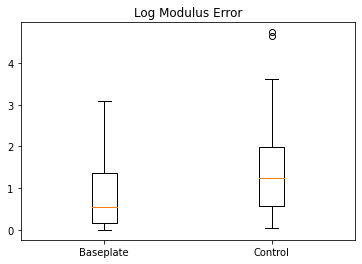

In [9]:
import scipy.stats as stats
import statistics
import numpy as np

baseplate_exp = experiment.Experiment(name="test")
baseplate_exp.set_best_model("experiments/baseplate/best.pt")
baseplate = torch.load("experiments/baseplate/best.pt")

baseplate_scores = []
ctrl_scores = []

print(len(baseplate_exp.test_data))
print(len(baseplate_exp.all_data))

labels = []

for i in range(len(baseplate_exp.all_data)):
    input_tensor, label, w, _ = baseplate_exp.getExample(3, i)
    labels.append(label.item())

# ctrl = np.random.normal(statistics.mean(labels), statistics.stdev(labels), len(labels), )
ctrl = [statistics.mean(labels)] * len(labels)
for i in range(len(baseplate_exp.test_data)):
    input_tensor, label, w, _ = baseplate_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = baseplate(input_tensor.to(device))
    actual = actual.cpu().detach().numpy()[0][0]
    baseplate_scores.append(abs(label.item()-actual))
    ctrl_scores.append(abs(label.item()-ctrl[i]))
    

fig, ax = plt.subplots()
ax.boxplot([baseplate_scores, ctrl_scores])
ax.set_xticklabels(['Baseplate', 'Control'])
ax.set_title("Log Modulus Error")

print(f"baseplate mean: {statistics.mean(baseplate_scores)}")
print(f"baseplate std: {statistics.stdev(baseplate_scores)}")
print(f"ctrl mean: {statistics.mean(ctrl_scores)}")
print(f"ctrl std: {statistics.stdev(ctrl_scores)}")

stats.ttest_ind(a=baseplate_scores, b=ctrl_scores, equal_var=False)

In [5]:
best_ind = []

for i in range(len(pretrained_exp.test_data)):
    input_tensor, label, w = pretrained_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pretrained_model(input_tensor.to(device))
    actual = actual.cpu().detach().numpy()[0][0]
    best_ind.append((i, abs(label.item()-actual)))
for i in range(len(pnipam_exp.test_data)):
    input_tensor, label, w = pnipam_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pnipam_model(input_tensor.to(device))
    actual = actual.cpu().detach().numpy()[0][0]
    best_ind[i] = (i, abs(label.item()-actual) - best_ind[i][1])
best_ind.sort(key=lambda x: x[1])
print(best_ind[0:20])


[(59, -0.5649621486663818), (29, -0.4824838638305664), (55, -0.47489356994628906), (50, -0.4391160011291504), (60, -0.42105817794799805), (9, -0.4024815559387207), (14, -0.3922421932220459), (53, -0.3506894111633301), (15, -0.3441758155822754), (71, -0.29076690163265084), (48, -0.269808292388916), (26, -0.26383066177368164), (74, -0.22736496414790963), (75, -0.20864558219909668), (97, -0.19865107536315918), (21, -0.1904761791229248), (66, -0.1853675314391694), (1, -0.18370723724365234), (58, -0.17809438705444336), (12, -0.17755937576293945)]


In [17]:
print(input_tensor.shape)


torch.Size([1, 3, 224, 224])


In [6]:
baseplate_cam = GradCAM(
    model=baseplate, target_layers=baseplate_layers, use_cuda=True)
pnipam_cam = GradCAM(model=pnipam_model,
                     target_layers=pnipam_layers, use_cuda=True)
pretrained_cam = GradCAM(model=pretrained_model,
                         target_layers=pretrained_layers, use_cuda=True)


In [7]:
baseplate_targets = [ClassifierOutputTarget(0)]
pnipam_targets = [ClassifierOutputTarget(0)]
pretrained_targets = [ClassifierOutputTarget(0)]


Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

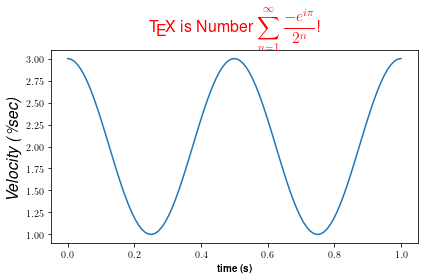

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')


In [39]:
import os

for i in range(len(baseplate_exp.test_data)):
    fig = plt.figure(figsize=(3, 13))
    plt.rcParams['text.usetex'] = True
    # sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('jet'))
    # sm.set_clim(vmin=0, vmax=100)
    # plt.colorbar(sm)
    input_tensor, label, w, path = baseplate_exp.getExample(2, i)
    filename, ext = os.path.splitext(os.path.basename(path))

    fig.suptitle(filename.split()[0], fontsize=25)
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)

    input_tensor = input_tensor.unsqueeze(0)
    actual = baseplate(input_tensor.to(device))
    grayscale_cam = baseplate_cam(
        input_tensor=input_tensor, targets=baseplate_targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    fig.add_subplot(4, 1, 1)
    plt.axis('off')
    plt.imshow(input_tensor.cpu().detach().numpy()[0].transpose(1, 2, 0))

    # Adds a subplot at the 1st position
    fig.add_subplot(4, 1, 2)
    plt.axis('off')
    actual_label = actual.cpu().detach().numpy()[0][0]
#     plt.gca().set_title(f"Baseplate \n Actual: {label:.4f} logPa, predicted: {actual_label:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    plt.imshow(visualization)
    plt.text(0.5, -0.1, fr'$\Delta E={abs(actual_label-label):.4f}$', size=15, ha="center",
             transform=plt.gca().transAxes)

    input_tensor, label, w, path = pretrained_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pretrained_model(input_tensor.to(device))
    grayscale_cam = pretrained_cam(
        input_tensor=input_tensor, targets=pretrained_targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    # Adds a subplot at the 1st position
    fig.add_subplot(4, 1, 4)
    plt.axis('off')
    actual_label = actual.cpu().detach().numpy()[0][0]
#     plt.gca().set_title(f"Pretrained \n Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    plt.imshow(visualization)
    plt.text(0.5, -0.1, fr'$\Delta E={abs(actual_label-label):.4f}$', size=15, ha="center",
             transform=plt.gca().transAxes)
    input_tensor, label, w, path = pnipam_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pnipam_model(input_tensor.to(device))
    grayscale_cam = pnipam_cam(
        input_tensor=input_tensor, targets=pnipam_targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    # Adds a subplot at the 1st position
    fig.add_subplot(4, 1, 3)
    plt.axis('off')
    actual_label = actual.cpu().detach().numpy()[0][0]

    # plt.gca().set_title(f"PNIPAM \n Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    img = plt.imshow(visualization)
    plt.text(0.5, -0.1, fr'$\Delta E={abs(actual_label-label):.4f}$', size=15, ha="center",
             transform=plt.gca().transAxes)
    plt.savefig(f"figs/rotate/{filename}.png")
    plt.close()


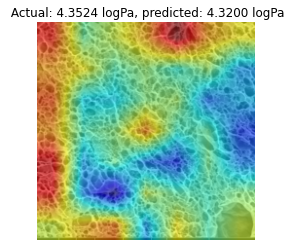

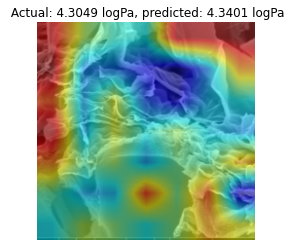

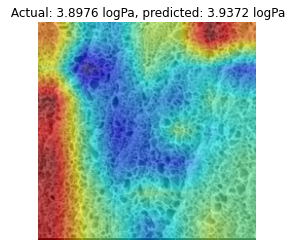

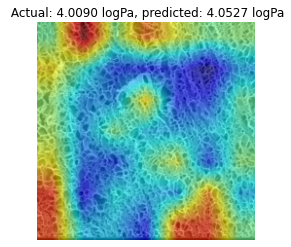

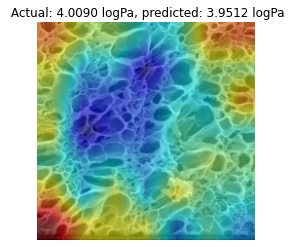

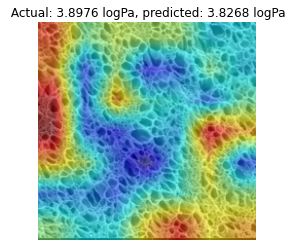

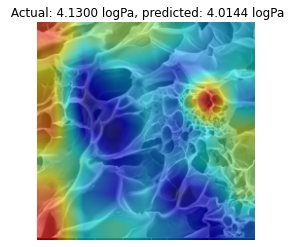

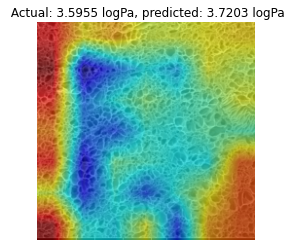

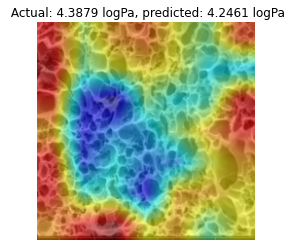

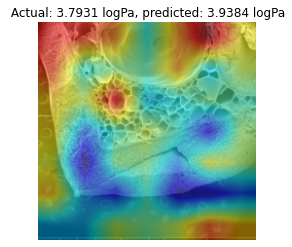

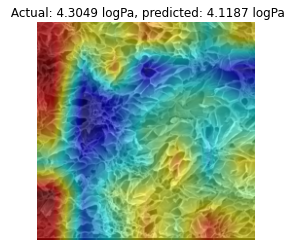

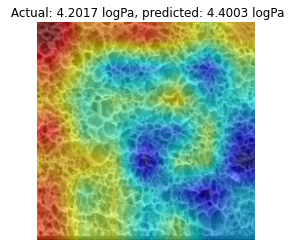

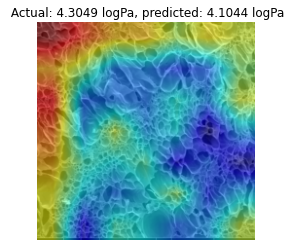

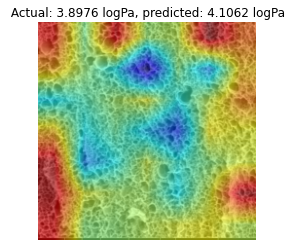

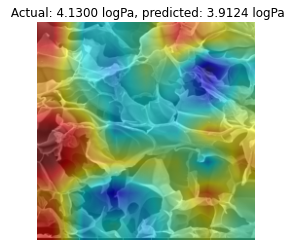

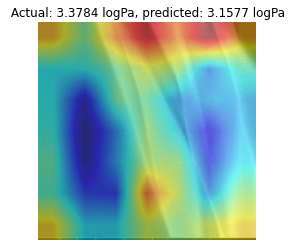

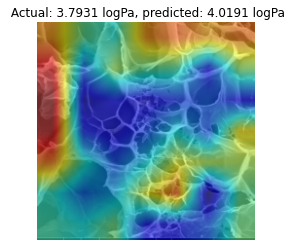

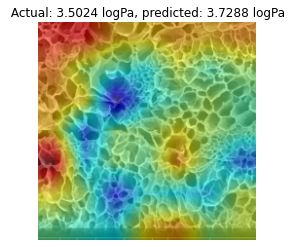

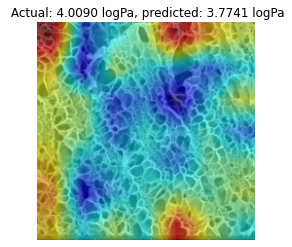

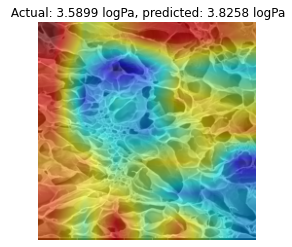

In [9]:
for i, j in best_ind[0:20]:

    input_tensor, label, w = test_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = model(input_tensor.to(device))
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    plt.figure()
    plt.axis('off')
    plt.gca().set_title(
        f" Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    plt.imshow(visualization)


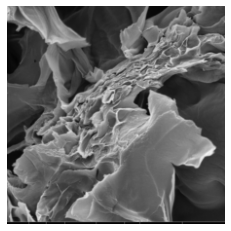

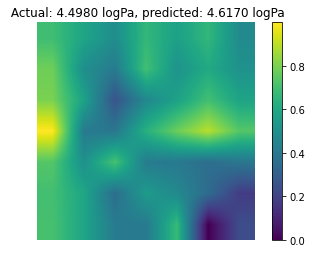

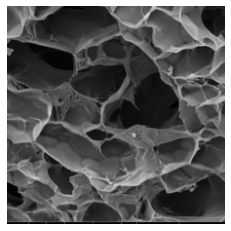

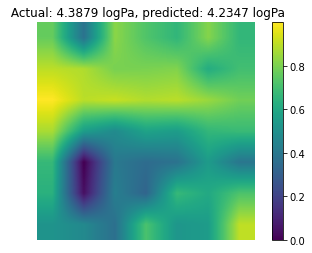

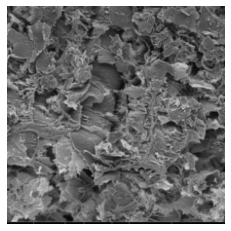

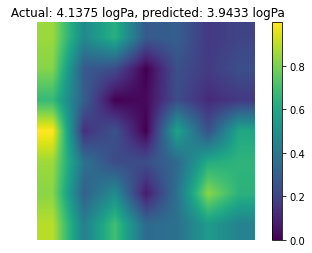

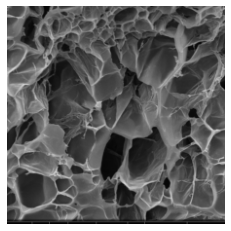

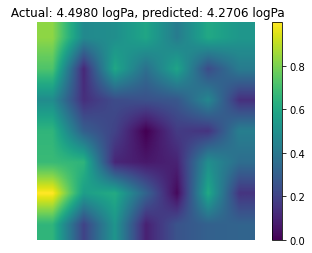

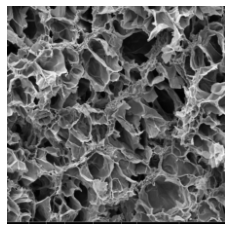

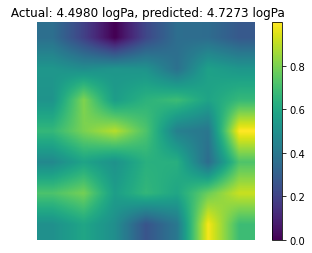

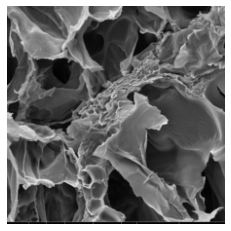

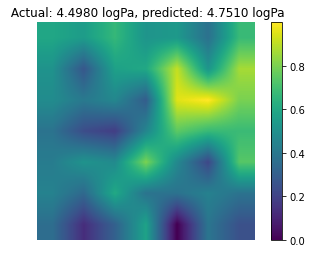

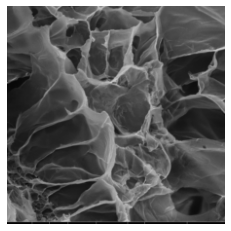

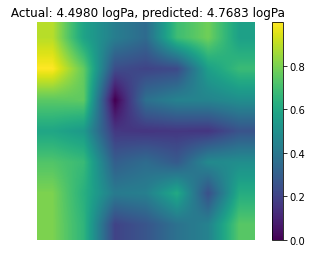

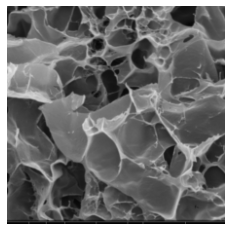

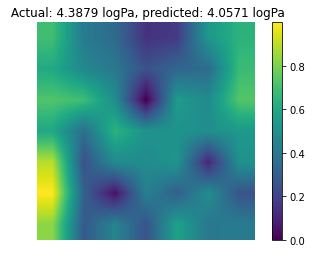

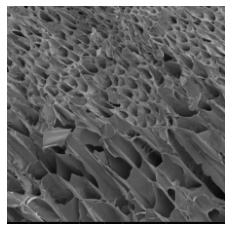

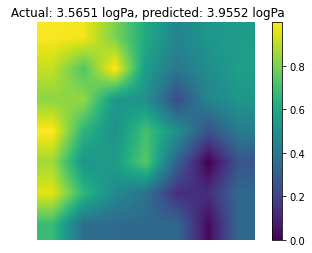

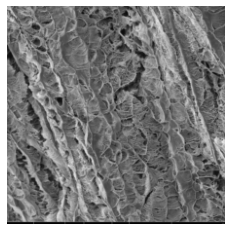

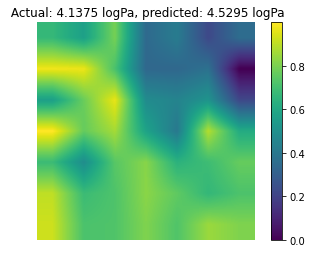

In [53]:
for i, j in best_ind[0:10]:

    input_tensor, label, w = test_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = model(input_tensor.to(device))
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    plt.figure()
    plt.imshow(input_tensor.squeeze().permute(1, 2, 0))
    plt.axis('off')
    plt.figure()
    plt.gca().set_title(
        f" Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")
    plt.imshow(grayscale_cam)
    plt.colorbar()
    plt.axis('off')
# visualization = show_cam_on_image(input_tensor.squeeze(0), grayscale_cam, use_rgb=True)


(-0.5, 223.5, 223.5, -0.5)

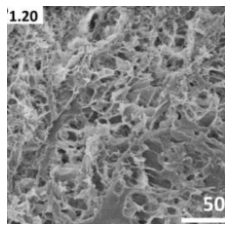

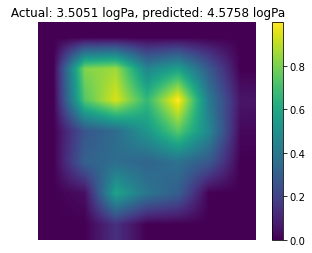

In [22]:
eigencam = EigenCAM(model=model, target_layers=target_layers, use_cuda=True)
targets = [ClassifierOutputTarget(0)]
grayscale_cam = eigencam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
plt.figure(1)
plt.imshow(input_tensor.squeeze().permute(1, 2, 0))
plt.axis('off')
plt.figure(2)
plt.gca().set_title(
    f" Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")
plt.imshow(grayscale_cam)
plt.colorbar()
plt.axis('off')
# visualization = show_cam_on_image(input_tensor.squeeze(0), grayscale_cam, use_rgb=True)
